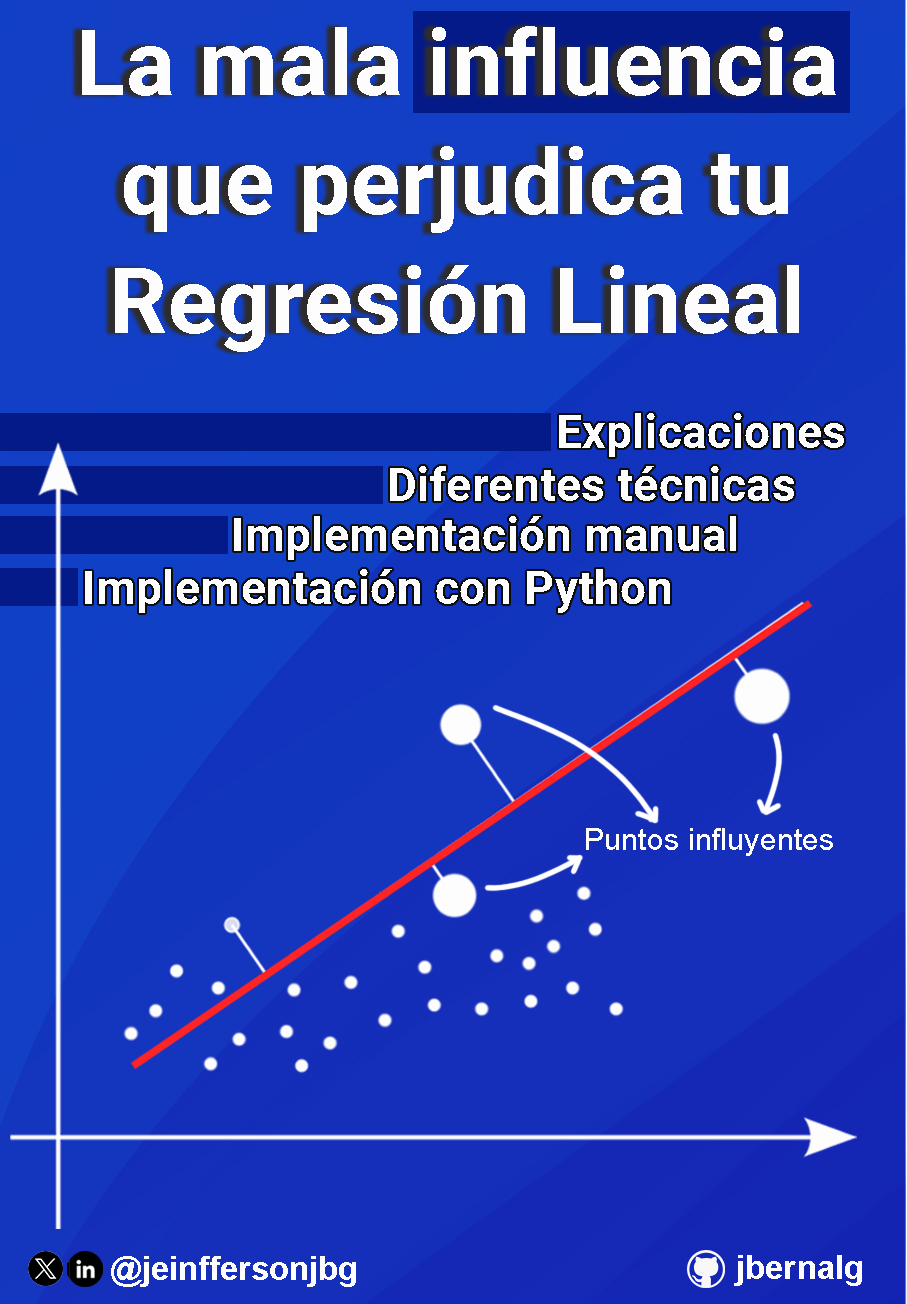

# Valores de gran influencia en la Regresión Lineal

Son valores que cambian considerablemente el ajuste de la Regresión Lineal. No están necesariamente asociados con residuos grandes. Detectarlos y omitirlos es el trabajo a realizar para mejorar las predicciones en un modelo de regresión lineal.

Veamos un ejemplo para entenderlo mejor

## Librerias a utilizar

In [324]:
# librerias
%matplotlib inline
# libreria para crear una regresion a partir de puntos dados
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

## Un breve ejemplo

Consideremos el siguiente conjunto de datos creados aleatoriamente con una variable predictora *X* y la variable objetivo *y*

In [325]:
# creamos una semilla para la reproducibilidad del experimento
np.random.seed(5)

In [326]:
# creamos 25 valores de X
x = np.random.normal(size=25)

# creamos 25 valores de Y relacionado de manera lineal con X
y = -(x/5) + np.random.normal(size=25)

# asignamos un outiler a los datos
x[0] = 8
y[0] = 8

Para graficar los puntos, creamos una función que calcula las coordenadas de una línea recta basada en la pendiente y el intercepto.

In [327]:
def coord_linea(pendiente, intercepto, ax):
    '''
    Calcula las coordenadas de una linea basado en la pendiente y el intercepto
    '''
    # obtener los limites del eje x
    x_vals = np.array(ax.get_xlim())
    
    # obtener los limites del eje y
    y_vals = intercepto + pendiente*x_vals
    
    # Devolver los valores de x e y
    return x_vals, y_vals

Ahora, graficamos todos los puntos y su respectiva línea de regresión.

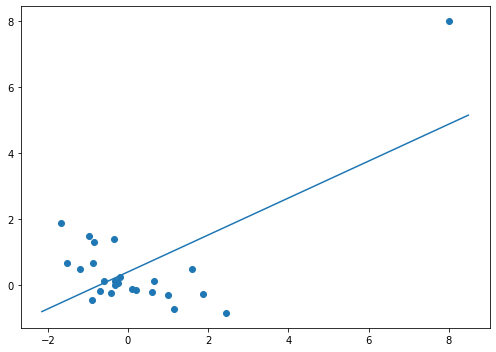

In [328]:
# tamano de la grafica 
fig, ax = plt.subplots(figsize = (7,5))
# grafico de dispersion
ax.scatter(x,y)
# calculo de la reegresion en los puntos
pendiente, intercepto, _, _, _ = linregress(x, y)
# grafica de la linea de regresion
ax.plot(*coord_linea(pendiente, intercepto, ax))
plt.tight_layout();

Notamos que los datos se agrupan en cierta zona a excepción del punto (8,8) que se encuentra en la esquina superior derecha. Este punto hace que la línea de regresión tenga pendiente positiva.

Ahora, vamos a omitir el dicho punto y trazar nuevamente la respectiva línea de regresión.

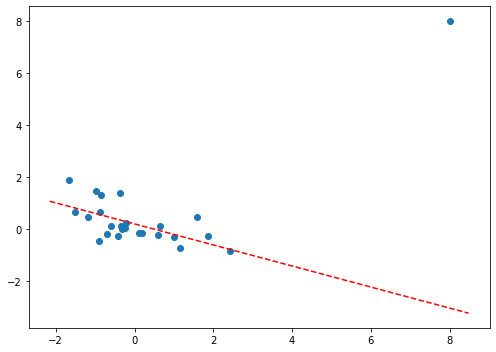

In [329]:
# tamano de la grafica 
fig, ax = plt.subplots(figsize = (7,5))
# grafico de dispersion
ax.scatter(x,y)
# calculo de la regresion en los puntos sin considerar el outlier
pendiente2, intercepto2, _, _, _ = linregress(x[1:], y[1:])
#grafica de la linea de regresion
ax.plot(*coord_linea(pendiente2, intercepto2, ax), '--', c='red')
plt.tight_layout();

En este caso, vemos que la regresión se ajusta mejor a la mayoría de los datos teniendo una pendiente negativa. De esta forma vemos que el outlier, en este caso, tiene una gran influencia sobre la regresión.

Existen diferentes técnicas para encontrar los puntos de gran influencia. En lo que sigue te presento los 3 más importantes implementados de manera manual y tambien utilizando Python.

## **1.- Apalancamiento (Hat Values)**

Mide la distancia de un punto de datos respecto al centro del espacio de variables predictoras. Para obtenerlos, utilizamos los *Hat Value* que son los elementos diagonales de la *Matriz de hat* **(H)**. La *Matriz de Hat* se calcula mediante la siguiente fórmula:

$$H = X(X^{T}X)^{-1}X^{T}$$

donde:

- $X$ es la matriz de características.
- $X^T$ es la traspuesta de $X$.
- $(X^{T}X)^{-1}$ es la inversa de $X^{T}X$

Los puntos de datos con alto apalancamiento tienen un mayor potencial para influir en los coeficientes de regresión debido a que están alejados de la media de los predictores. 

Para entender la *Matriz de Hat* debemos conocer la matriz de características: matriz que contiene los valores de las variables predictoras para todas las observaciones en un conjunto de datos y se denota por $X$. Cada fila representa una observación y cada columna una variable predictora.

Si hay $n$ observaciones y $p$ variables predictoras, la matriz de características tendrá un tamaño de $n(p+1)$. Es decir, la matriz contiene una columna extra que será la primera columna en $X$ y contiene los parámetros para el término de intercepto.

### *Obtener los Hat Values de forma manual*
Vamos a calcular los *Hat values* para un conjunto de datos de 10 observaciones, dos variables predictoras y la variable objetivo de forma manual.

**Generamos los datos de ejemplo**

In [330]:
# semilla
np.random.seed(42)

# numero de observaciones
n = 10

# generamos los valores aleatorios entre 0 y 1 de dos variables predictoras
X = np.random.rand(n, 2)

# Generamos los valores de la variable objetivo utilizando una combinacion lineal de las dos variables predictoras
# agregamos ruido aleatorio que sigue una D. normal
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(n)

# visualizamos los datos en un DataFrame
data = pd.DataFrame(X,y)
data

0         1
 2.012218  0.374540  0.950714
 3.707546  0.731994  0.598658
-0.127979  0.156019  0.155995
 0.494299  0.058084  0.866176
 4.685139  0.601115  0.708073
 1.775797  0.020584  0.969910
 2.989534  0.832443  0.212339
-0.512464  0.181825  0.183405
 1.417857  0.304242  0.524756
 1.989216  0.431945  0.291229

**Calculamos la matriz de Hat para el conjunto de datos dado**

In [331]:
# agregamos una columna de unos a la matriz de caracteristicas que representen el termino intercepto
X = np.hstack((np.ones((n,1)), X))

# calculamos el termino X^T * X
X_traspuesta_X = np.dot(X.T, X)

# calculamos la inversa de X^T * X
X_traspuesta_X_inv = np.linalg.inv(X_traspuesta_X)

# calculamos la matriz de hat mediante la formula
H = np.dot(np.dot(X, X_traspuesta_X_inv), X.T)

# mostrar valores de H
H

array([[ 0.28855531,  0.17628608, -0.11160712,  0.20403219,  0.20834643,
         0.24681763,  0.01133721, -0.09519126,  0.08077469, -0.00935115],
       [ 0.17628608,  0.31479274, -0.09138118, -0.01812641,  0.26054845,
        -0.02055277,  0.30164213, -0.0718099 ,  0.05932126,  0.08927961],
       [-0.11160712, -0.09138118,  0.39829974,  0.07538201, -0.0887087 ,
         0.03871541,  0.06291945,  0.3724417 ,  0.14049524,  0.20344346],
       [ 0.20403219, -0.01812641,  0.07538201,  0.29695829,  0.05811202,
         0.33775649, -0.15581051,  0.07317641,  0.11805162,  0.01046792],
       [ 0.20834643,  0.26054845, -0.0887087 ,  0.05811202,  0.23631874,
         0.07017311,  0.1997692 , -0.07107127,  0.06807559,  0.05843643],
       [ 0.24681763, -0.02055277,  0.03871541,  0.33775649,  0.07017311,
         0.39038106, -0.20141567,  0.03884733,  0.11721958, -0.01794216],
       [ 0.01133721,  0.30164213,  0.06291945, -0.15581051,  0.1997692 ,
        -0.20141567,  0.44840042,  0.07189694

**Obtenemos los hat values de la matriz H**

In [332]:
# los hat values son los valores de la diagonal de la matriz hat
hat_values = np.diag(H)
hat_values

array([0.28855531, 0.31479274, 0.39829974, 0.29695829, 0.23631874,
       0.39038106, 0.44840042, 0.34892176, 0.10784536, 0.16952657])

> El resultado es un array con los hat values para cada una de las 10 observaciones.

### *Obtener los Hat Values con Python*
Vamos a obtener los *hat values* para los datos del ejemplo anterior utilizando la librería StatsModels de Python. Para ello, se requiere que el modelo de regresión esté entrenado previamente. Veamos el procedimiento:

**Generamos los datos de ejemplo**

In [333]:
# semilla
np.random.seed(42)

# numero de observaciones
n = 10

# generamos los valores aleatorios entre 0 y 1 de dos variables predictoras
X = np.random.rand(n, 2)

# Generamos los valores de la variable objetivo utilizando una combinacion lineal de las dos variables predictoras
# agregamos ruido aleatorio que sigue una D. normal
y = 3*X[:, 0] + 2*X[:, 1] + np.random.randn(n)

**Obtenemos los hat values**

In [334]:
# agregamos una columna de unos a la matriz de caracteristicas para incluir el temrino de intercepto
X = sm.add_constant(X)

# ajustamos los datos a un modelo de regresion lineal
model = sm.OLS(y, X).fit()

# obtenemos los hat values para cada observacion
influence = model.get_influence()
hat_values = influence.hat_matrix_diag
hat_values

array([0.28855531, 0.31479274, 0.39829974, 0.29695829, 0.23631874,
       0.39038106, 0.44840042, 0.34892176, 0.10784536, 0.16952657])

> Al igual que en el caso anterior, obtenemos los hat values para cada observación pero esta vez con menos pasos y menos líneas de código.

### *Visualización de los Hat Values*
Una vez obtenido los hat values, podemos graficarlo para determinar, de manera más fácil, aquellas observaciones con alto apalancamiento.

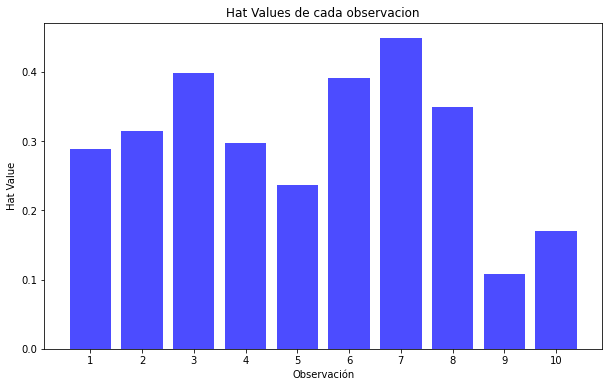

In [335]:
# tamano del grafico
plt.figure(figsize=(10, 6))
# grafico de barra
plt.bar(range(1, 11), hat_values, color='blue', alpha=0.7)
plt.xlabel('Observación')
plt.ylabel('Hat Value')
plt.title('Hat Values de cada observacion')
plt.xticks(range(1, 11));  # Asegurar que las etiquetas del eje x muestren los índices de las observaciones

> La gráfica indica que las observaciones 3, 6 y 7 son puntos con alto apalancamiento para el ajuste del modelo.

## **2.- Distancia de Cook**

Es una métrica útil para identificar observaciones influyentes en el ajuste del modelo que combina el apalancamiento y el tamaño del residuo de cada observación. Recordemos que el residuo es la distancia entre un valor real y la línea de regresión. Esta métrica analiza el cambio de los coeficientes de la regresión al omitir una observación específica. La distancia de Cook para la i-ésima observación se define como:

$$D_{i} = \frac{\sum_{j=1}^{N}(y_{j} - y_{j(i)})}{p\cdot\widehat{\sigma}^2} \cdot \frac{h_{i}}{(1-h_i)^2}$$

Donde:
- $y_j$ es el valor predicho para la j-ésima observación utilizando el modelo.
- $y_{j(i)}$ es el valor predicho para la j-ésima observación utilizando el modelo sin la i-ésima obervación.
- $p$ es el número de variables predictoras en el modelo incluido el intercepto.
- $\widehat{\sigma}^2$ es la varianza residual estimada del modelo.
- $h_i$  es el hat value para la i-ésima obervación.

Es importante destacar que para calcular la distancia de Cook se requiere tener el modelo de regresión ya entrenado para así obtener la varianza residual y los residuos de cada observación, valores requeridos por la fórmula. Veamos el procedimiento

### *Obtener la Distancia de Cook de forma manual*
Vamos a trabajar sobre un conjunto de datos generados aleatoriamente con una variable predictora $X$ y una variable objetivo $y$. Veamos cómo calcular la distancia de Cook de todas las observaciones mediante una función personalizada.

In [336]:
# funcion que calcula la distancia de cook de todas las observaciones al mismo tiempo
def Dist_Cook(X, y, y_pred):
    '''
    X: matriz de caracteristicas
    y: variable objetivo
    y_pred: predicciones del modelo de regresion lineal
    '''
    
    # n: numero de observaciones. p: numero de variables predictoras    
    n, p = X.shape
    
    # calcular los hat values de las observaciones
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    hat_values = np.diag(H)
    
    # calcular residuos del modelo
    residuos = y - y_pred
    
    # calcular la varianza residual estimada
    varianza =  np.sum(residuos**2) / (n - p)
    
    # calcular la distancia de cook por medio de la formula
    cooks_d = (residuos**2 / (p * varianza)) * (hat_values / (1 - hat_values)**2)
    
    # retornar array con las distancias de cooks de cada observacion
    return cooks_d

**Una vez creada la función, generamos los datos de ejemplo.**

In [337]:
# semilla 
np.random.seed(42)

# 20 valores de la variable X
X = np.random.rand(20, 1)

# 20 valores de la variable y relacionados con X de forma lineal
# se agrega ruido aleatorio normal
y = 2*X[:, 0] + np.random.randn(20)

**Graficamos los puntos y su respectiva linea de regresión**

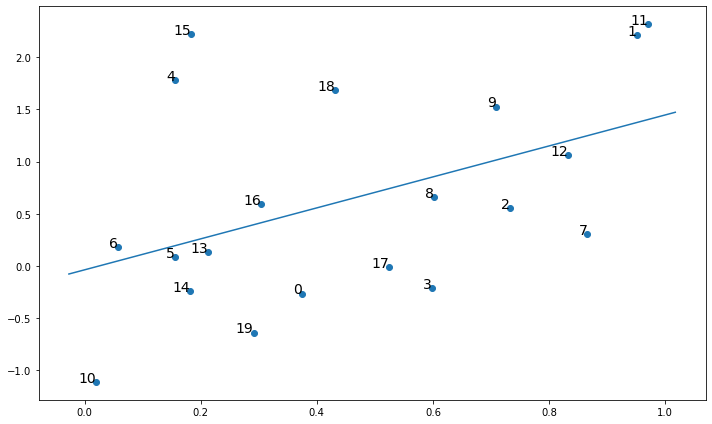

In [338]:
# tamano de la grafica 
fig, ax = plt.subplots(figsize = (10,6))
# grafico de dispersion
ax.scatter(X,y)
# calculo de la reegresion en los puntos
pendiente, intercepto, _, _, _ = linregress(X[:,0], y)
# grafica de la linea de regresion
ax.plot(*coord_linea(pendiente, intercepto, ax))
# Añadir etiquetas de índice a cada punto
for i in range(len(X)):
    ax.text(X[i, 0], y[i], str(i), fontsize=14, ha='right')
plt.tight_layout();


**Calculamos la distancia de cook para todas las observaciones con la función antes definida.**

In [339]:
# agregamos columna de unos a la matriz de caracteristicas
X_caract = sm.add_constant(X)

# ajustamos el modelo de regresion lineal
model = sm.OLS(y, X_caract).fit()

# obtenemos las predicciones del modelo
y_pred = model.predict(X_caract)

# calculamos distancia de cook
cooks = Dist_Cook(X_caract, y, y_pred)

cooks

array([0.02139906, 0.1146324 , 0.01573758, 0.04572117, 0.18076846,
       0.00085448, 0.00194765, 0.0998175 , 0.00157854, 0.01547689,
       0.15519899, 0.14654433, 0.00176218, 0.00122277, 0.01444876,
       0.25418375, 0.00135222, 0.0191031 , 0.03795174, 0.04646406])

> El array nos muestra los valores de la distancia de Cook para cada observacion

### *Obtener la Distancia de Cook con Python*
Gracias a la librería StastModel de Python podemos calcular las distancias de cooks para todas las observaciones de forma directa, ahorrando algunos calculos y líneas de código.

Tomemos como ejemplo el conjunto de datos del ejemplo anterior

**Calculamos la distancia de cook con StatsModels**

In [340]:
# agregamos la columna de unos en la matriz de caracteristicas
X_caract = sm.add_constant(X)

# ajustamos el modelo de regresion lineal a los datos
model = sm.OLS(y,X_caract).fit()

# obtenemos un diagnostico de influencia de todas las observaciones
influencia = model.get_influence()

# calculamos las distancias de cook de las observaciones
cook_d = influencia.cooks_distance[0]

cook_d

array([0.02139906, 0.1146324 , 0.01573758, 0.04572117, 0.18076846,
       0.00085448, 0.00194765, 0.0998175 , 0.00157854, 0.01547689,
       0.15519899, 0.14654433, 0.00176218, 0.00122277, 0.01444876,
       0.25418375, 0.00135222, 0.0191031 , 0.03795174, 0.04646406])

> Los resultados arrojan los mismos que de forma manual, con la diferencia que se utiliza menos código y cálculo y esto es gracias a la librería StatsModel.

### *Visualización de las observaciones con su respectiva distancia de Cook*

Ahora visualicemos las distancias de Cook de las observaciones

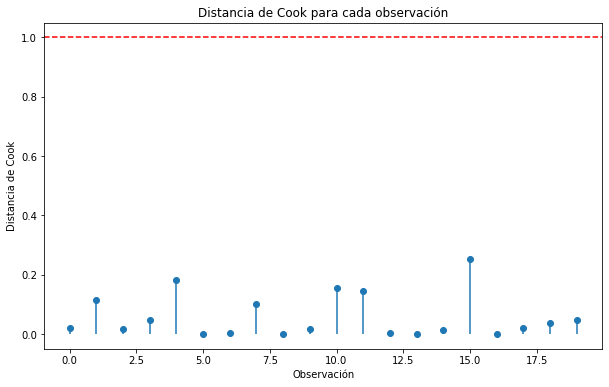

In [341]:
# Visualizar la distancia de Cook
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cook_d)), cook_d, basefmt=" ", use_line_collection=True)
plt.axhline(y=1, color='r', linestyle='--')  # Línea de referencia en y=1
plt.xlabel('Observación')
plt.ylabel('Distancia de Cook')
plt.title('Distancia de Cook para cada observación');

> De las 20 observaciones vemos algunas con una distancia de Cook considerable. Ahora necesitamos un límite por encima del cual podemos considerar observaciones de gran influencia.

### *Cómo determinar qué valores con distancias de Cook tienen una influencia muy alta sobre el modelo?*

Una regla general es que una observación tiene una gran influencia en el ajuste del modelo si la distancia de Cook es superior a $4/(n-p-1)$, con $n$ el número de observaciones y $p$ el número de variables predictoras.

Analicémos del ejemplo anterior, si existen observaciones con alta influencia para el modelo de regresión lineal.

In [342]:
# n numero de observaciones, p: numero de variables predictoras
n, p = X.shape

# calculo del limite 
lim = 4/(n-p-1)
lim = round(lim, 2)

influyentes = np.where(cooks > lim)[0]
print(f"Observaciones influyentes (distancia de Cook > {lim}): {influyentes}")

Observaciones influyentes (distancia de Cook > 0.22): [15]


> El resultado muestra, para este conjunto de datos que la observación número 15 posee una distancia de Cook superior al límite, por tanto, se considera de gran influencia para el ajuste del modelo.

Si vemos la gráfica de dispersión anterior, podemos notar claramente que el punto con índice 15 es el de mayor influencia debido a su gran residuo, para este caso. Veamos cómo se ajusta la regresión al omitir dicho punto.

In [343]:
# eliminar valor del punto 15 en X
X_new = np.delete(X, 15)
# eliminar valor del punto 15 en y
y_new = np.delete(y, 15)
# mostrar dimensiones
print(X_new.shape, y_new.shape)

(19,) (19,)


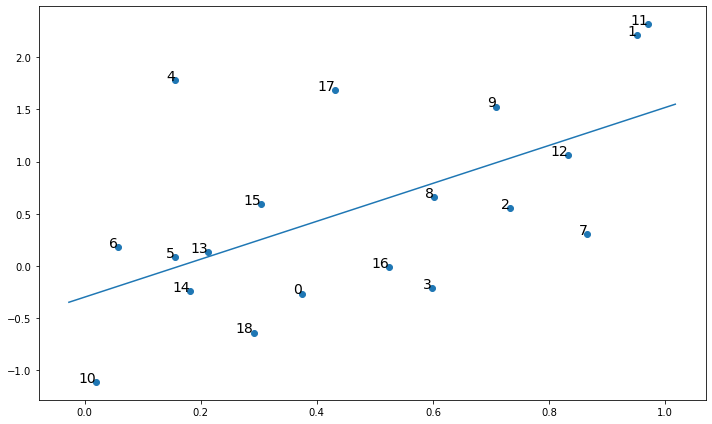

In [344]:
# tamano de la grafica 
fig, ax = plt.subplots(figsize = (10,6))
# grafico de dispersion
ax.scatter(X_new,y_new)
# calculo de la reegresion en los puntos
pendiente, intercepto, _, _, _ = linregress(X_new, y_new)
# grafica de la linea de regresion
ax.plot(*coord_linea(pendiente, intercepto, ax))
# Añadir etiquetas de índice a cada punto
for i in range(len(X_new)):
    ax.text(X_new[i], y_new[i], str(i), fontsize=14, ha='right')
plt.tight_layout();


> Se observa una mejoría en el ajuste de la regresión al omitir la observación 15 de los datos.

## **3.- Diagrama de Influencia**

Es una herramienta visual utilizada para identificar observaciones que tienen un gran impacto en el ajuste del modelo de regresión lineal. Combinan la información de los residuos estandarizados, los valores de apalancamiento (hat values) y la distancia de Cook para visualizar qué tan influyentes son las observaciones individuales en el modelo.

Veamos cómo crear este diagrama con la libreria statsmodel

### *Diagrama de influencia con StatsModel*
Tomemos como ejemplo, los datos del ejemplo anterior

**Generamos los datos de ejemplo**

In [345]:
# semilla 
np.random.seed(42)

# 20 valores de la variable X
X = np.random.rand(20, 1)

# 20 valores de la variable y relacionados con X de forma lineal
# se agrega ruido aleatorio normal
y = 2*X[:, 0] + np.random.randn(20)

**Creamos el diagrama con StatsModel**

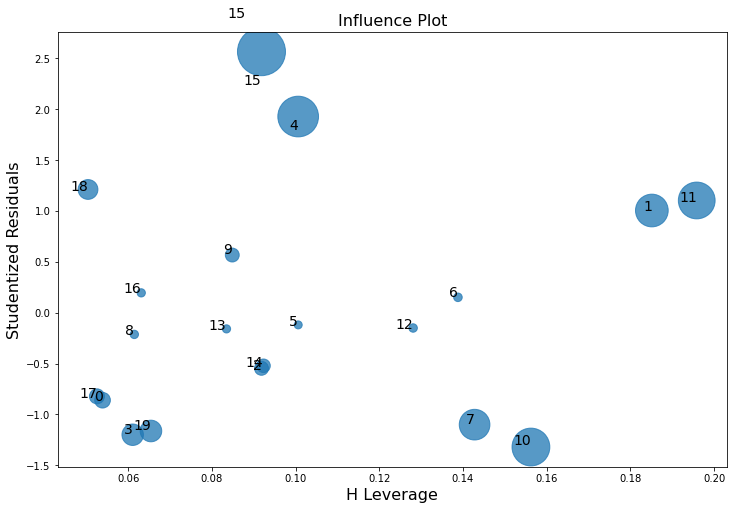

In [346]:
# agregamos columna de unos en la matriz de caracteristicas que representa el intercepto
X = sm.add_constant(X)

# ajustamos el modelo de regresion a los datos
model = sm.OLS(y, X).fit()

# diagrama de influencia
fig, ax = plt.subplots(figsize=(12, 8))
influence_plot = sm.graphics.influence_plot(model, ax=ax, criterion="cooks", alpha=0.05)

# Obtener los valores de apalancamiento y residuos estandarizados
influence = model.get_influence()
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Añadir etiquetas de número de observación
for i in range(len(X)):
    ax.text(leverage[i], standardized_residuals[i], str(i), fontsize=14, ha='right')

plt.show()



Interpretémos el gráfico:

- Observaciones con valores altos en *x* tienen un alto hat value y, por tanto, tienen el potencial de influir significativamente en el ajuste del modelo.

- Observaciones con valores altos en *y* tienen residuos grandes, lo cual indica un mal ajuste del modelo para esas observaciones.

- El tamaño del punto representa la distancia de Cook. Punto grandes indican una mayor influencia en los coeficientes del modelo.

## Conclusiones

Debemos tener en cuenta que la identificación de observaciones influyentes es útil para pequeños conjuntos de datos. Para regresiones con muchos registros, es poco probable que una sola observacion tenga el peso suficiente para causar influencia extrema en el ajuste, aunque los valores atípicos si pueden tener dicha influencia.

Para fines de detección de anomalías, la identificación de observaciones influyentes puede ser muy útil.

De las 3 técnicas expuestas, la más poderosa es el Diagrama de Influencia ya que combina las dos anteriores con una evaluación del residuo de cada observación. Además su implementación es sencilla y fácil de seguir.

Espero te haya servido y sígueme para más contenido de Ciencia de Datos!! 